## Load the Data

In [19]:
import pandas as pd

# Load the dataset
file_path = 'D:/pyprog/QAT_stock/stock_data.csv'
stock_data = pd.read_csv(file_path)

# Display summary information about the dataset
print(stock_data.info())

# Display the first few rows of the dataset
print(stock_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158834 entries, 0 to 158833
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Date            158834 non-null  object 
 1   Open            158834 non-null  float64
 2   High            158834 non-null  float64
 3   Low             158834 non-null  float64
 4   Close           158834 non-null  float64
 5   Volume          158834 non-null  int64  
 6   Dividends       158834 non-null  float64
 7   Stock Splits    158834 non-null  float64
 8   Company Name    158834 non-null  object 
 9   Ticker Symbol   158834 non-null  object 
 10  Market Cap      158834 non-null  int64  
 11  PE Ratio        140797 non-null  float64
 12  EPS             155229 non-null  float64
 13  PB Ratio        158834 non-null  float64
 14  Dividend Yield  133427 non-null  float64
 15  ROE             158834 non-null  float64
 16  Debt-to-Equity  114822 non-null  float64
 17  50-day MA 

## Missing Values

In [20]:
# Check for missing values
missing_values = stock_data.isnull().sum()
print(missing_values)


Date                  0
Open                  0
High                  0
Low                   0
Close                 0
Volume                0
Dividends             0
Stock Splits          0
Company Name          0
Ticker Symbol         0
Market Cap            0
PE Ratio          18037
EPS                3605
PB Ratio              0
Dividend Yield    25407
ROE                   0
Debt-to-Equity    44012
50-day MA          2548
200-day MA        10339
RSI                1217
MACD                  0
Signal Line           0
dtype: int64


## Convert Date Column

In [21]:
# Convert 'Date' column to datetime format
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Set 'Date' as the index
stock_data.set_index('Date', inplace=True)

# Display the first few rows to confirm changes
print(stock_data.head())


                               Open      High       Low     Close   Volume  \
Date                                                                         
2010-02-22 00:00:00+03:00  3.902972  3.902972  3.853980  3.863779  1562781   
2010-02-23 00:00:00+03:00  3.873576  3.873576  3.824585  3.844182  1016378   
2010-02-24 00:00:00+03:00  3.853981  3.853981  3.788659  3.824585  1781743   
2010-02-25 00:00:00+03:00  3.853980  3.873576  3.850714  3.857246   613885   
2010-02-28 00:00:00+03:00  3.853981  3.857247  3.824586  3.853981   791697   

                           Dividends  Stock Splits Company Name Ticker Symbol  \
Date                                                                            
2010-02-22 00:00:00+03:00        0.0           0.0          QNB          QNBK   
2010-02-23 00:00:00+03:00        0.0           0.0          QNB          QNBK   
2010-02-24 00:00:00+03:00        0.0           0.0          QNB          QNBK   
2010-02-25 00:00:00+03:00        0.0           0

## Forward Fill Missing Values

In [22]:
# Forward fill
stock_data_ffill = stock_data.fillna(method='ffill')

# Check for remaining missing values after forward fill
missing_values_ffill = stock_data_ffill.isnull().sum()
print("Missing values after forward fill:")
print(missing_values_ffill)

Missing values after forward fill:
Open                  0
High                  0
Low                   0
Close                 0
Volume                0
Dividends             0
Stock Splits          0
Company Name          0
Ticker Symbol         0
Market Cap            0
PE Ratio              0
EPS                   0
PB Ratio              0
Dividend Yield        0
ROE                   0
Debt-to-Equity    25237
50-day MA            49
200-day MA          199
RSI                  13
MACD                  0
Signal Line           0
dtype: int64


## Backward Fill Remaining Missing Values

In [23]:
# Backward fill for any remaining missing values
stock_data_bfill = stock_data_ffill.fillna(method='bfill')

# Check for remaining missing values after backward fill
missing_values_bfill = stock_data_bfill.isnull().sum()
print("Missing values after backward fill:")
print(missing_values_bfill)


Missing values after backward fill:
Open              0
High              0
Low               0
Close             0
Volume            0
Dividends         0
Stock Splits      0
Company Name      0
Ticker Symbol     0
Market Cap        0
PE Ratio          0
EPS               0
PB Ratio          0
Dividend Yield    0
ROE               0
Debt-to-Equity    0
50-day MA         0
200-day MA        0
RSI               0
MACD              0
Signal Line       0
dtype: int64


## Fundamental Data

In [24]:
# Display summary statistics for fundamental data
print(stock_data_bfill[['PE Ratio', 'EPS', 'PB Ratio', 'Dividend Yield', 'ROE', 'Debt-to-Equity']].describe())


            PE Ratio            EPS       PB Ratio  Dividend Yield  \
count  158834.000000  158834.000000  158834.000000   158834.000000   
mean       19.861676       0.350265       1.367386        0.051555   
std        28.078747       0.576625       0.964763        0.014382   
min         5.350649      -1.700000       0.242263        0.011700   
25%         9.642858       0.060000       0.659305        0.042900   
50%        13.716667       0.250000       1.186594        0.051300   
75%        18.856522       0.680000       1.745366        0.062100   
max       187.900000       1.990000       5.984076        0.094800   

                 ROE  Debt-to-Equity  
count  158834.000000   158834.000000  
mean        0.067773       86.334825  
std         0.108223       96.417340  
min        -0.417360        0.167000  
25%         0.038150        7.939000  
50%         0.082370       46.911000  
75%         0.124470      151.736000  
max         0.342280      437.540000  


## Technical Data

In [25]:
# Calculate and display technical indicators
stock_data_bfill['50-day MA'] = stock_data_bfill['Close'].rolling(window=50).mean()
stock_data_bfill['200-day MA'] = stock_data_bfill['Close'].rolling(window=200).mean()

# Function to compute RSI
def compute_RSI(data, window):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    RS = gain / loss
    RSI = 100 - (100 / (1 + RS))
    return RSI

# Calculate RSI
stock_data_bfill['RSI'] = compute_RSI(stock_data_bfill, 14)

# Calculate MACD and Signal Line
stock_data_bfill['MACD'] = stock_data_bfill['Close'].ewm(span=12, adjust=False).mean() - stock_data_bfill['Close'].ewm(span=26, adjust=False).mean()
stock_data_bfill['Signal Line'] = stock_data_bfill['MACD'].ewm(span=9, adjust=False).mean()

# Display the first few rows to confirm changes
print(stock_data_bfill[['50-day MA', '200-day MA', 'RSI', 'MACD', 'Signal Line']].head())


                           50-day MA  200-day MA  RSI      MACD  Signal Line
Date                                                                        
2010-02-22 00:00:00+03:00        NaN         NaN  NaN  0.000000     0.000000
2010-02-23 00:00:00+03:00        NaN         NaN  NaN -0.001563    -0.000313
2010-02-24 00:00:00+03:00        NaN         NaN  NaN -0.004333    -0.001117
2010-02-25 00:00:00+03:00        NaN         NaN  NaN -0.003849    -0.001663
2010-02-28 00:00:00+03:00        NaN         NaN  NaN -0.003686    -0.002068


## Visualize Data

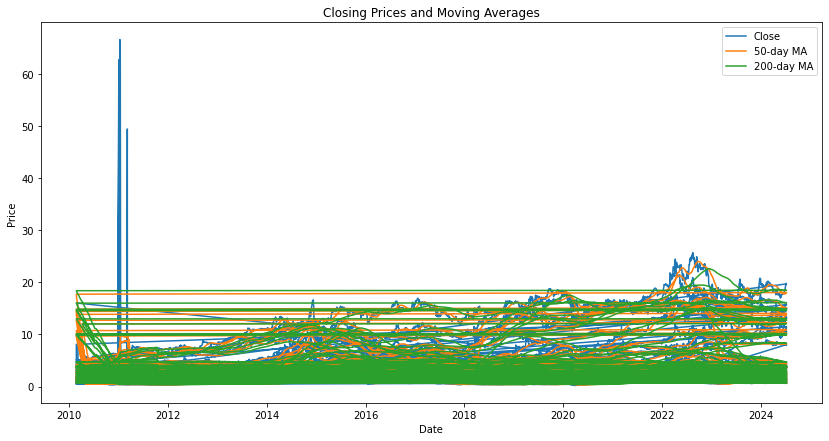

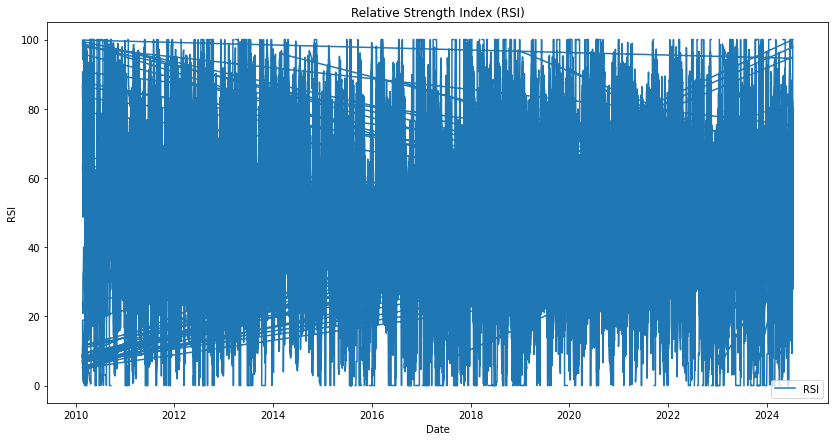

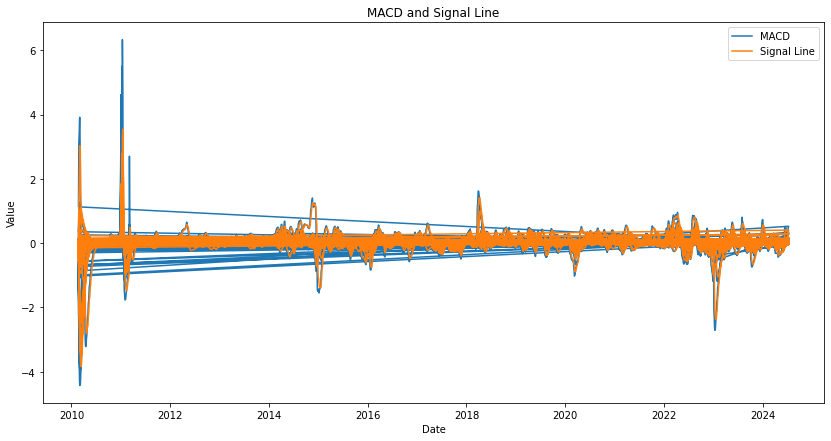

In [26]:
import matplotlib.pyplot as plt

# Plot closing prices and moving averages
plt.figure(figsize=(14, 7))
plt.plot(stock_data_bfill['Close'], label='Close')
plt.plot(stock_data_bfill['50-day MA'], label='50-day MA')
plt.plot(stock_data_bfill['200-day MA'], label='200-day MA')
plt.title('Closing Prices and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot RSI
plt.figure(figsize=(14, 7))
plt.plot(stock_data_bfill['RSI'], label='RSI')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()

# Plot MACD and Signal Line
plt.figure(figsize=(14, 7))
plt.plot(stock_data_bfill['MACD'], label='MACD')
plt.plot(stock_data_bfill['Signal Line'], label='Signal Line')
plt.title('MACD and Signal Line')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


##  Further Data Cleaning

### Check for Outliers and Anomalies

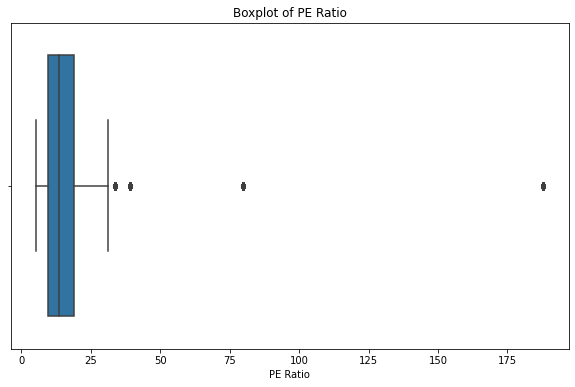

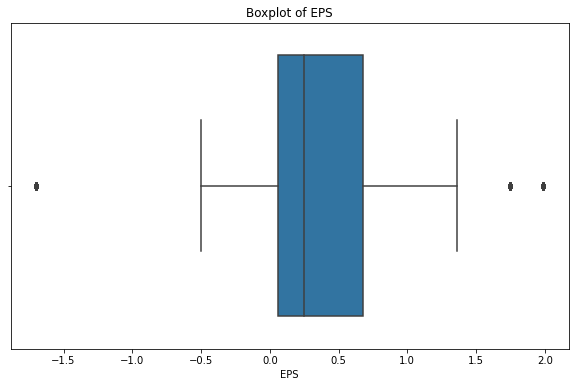

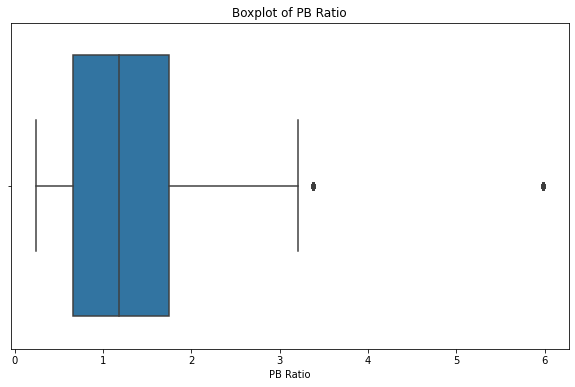

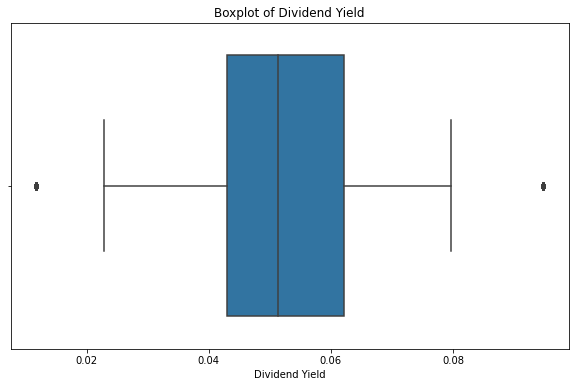

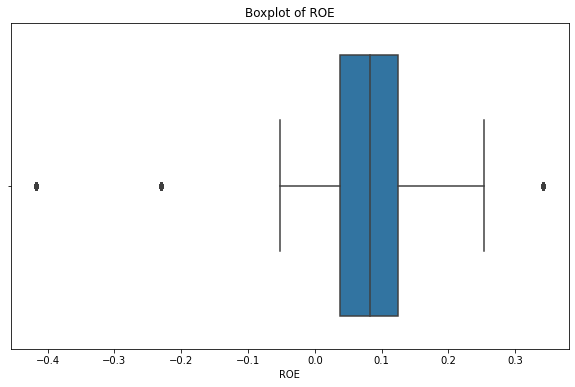

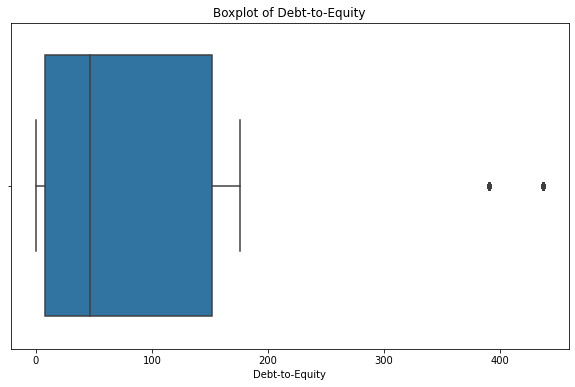

            PE Ratio            EPS       PB Ratio  Dividend Yield  \
count  158834.000000  158834.000000  158834.000000   158834.000000   
mean       19.861676       0.350265       1.367386        0.051555   
std        28.078747       0.576625       0.964763        0.014382   
min         5.350649      -1.700000       0.242263        0.011700   
25%         9.642858       0.060000       0.659305        0.042900   
50%        13.716667       0.250000       1.186594        0.051300   
75%        18.856522       0.680000       1.745366        0.062100   
max       187.900000       1.990000       5.984076        0.094800   

                 ROE  Debt-to-Equity  
count  158834.000000   158834.000000  
mean        0.067773       86.334825  
std         0.108223       96.417340  
min        -0.417360        0.167000  
25%         0.038150        7.939000  
50%         0.082370       46.911000  
75%         0.124470      151.736000  
max         0.342280      437.540000  


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize distributions to identify outliers
columns_to_check = ['PE Ratio', 'EPS', 'PB Ratio', 'Dividend Yield', 'ROE', 'Debt-to-Equity']

for column in columns_to_check:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=stock_data_bfill[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# Display summary statistics
print(stock_data_bfill[columns_to_check].describe())


### Handle Outliers

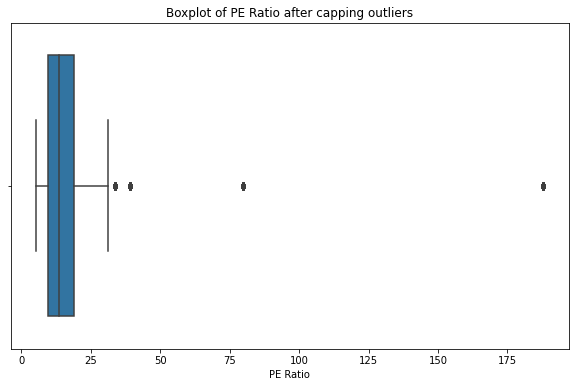

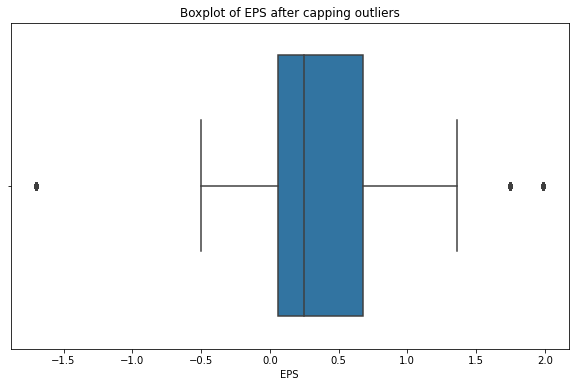

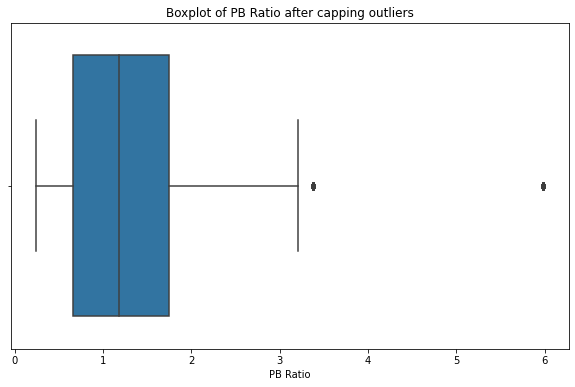

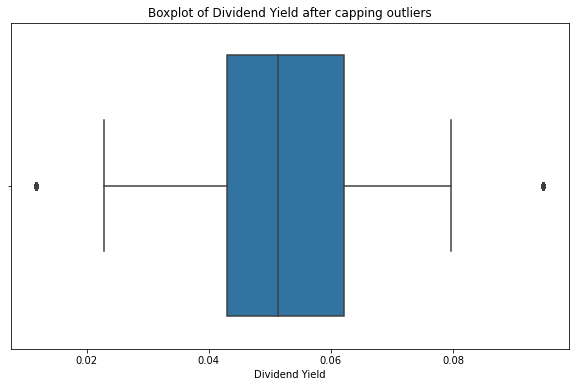

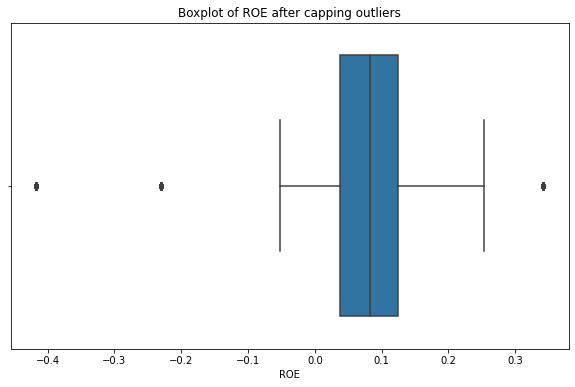

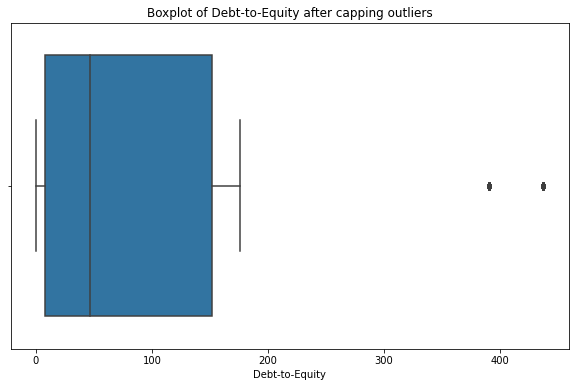

            PE Ratio            EPS       PB Ratio  Dividend Yield  \
count  158834.000000  158834.000000  158834.000000   158834.000000   
mean       19.861676       0.350265       1.367386        0.051555   
std        28.078747       0.576625       0.964763        0.014382   
min         5.350649      -1.700000       0.242263        0.011700   
25%         9.642858       0.060000       0.659305        0.042900   
50%        13.716667       0.250000       1.186594        0.051300   
75%        18.856522       0.680000       1.745366        0.062100   
max       187.900000       1.990000       5.984076        0.094800   

                 ROE  Debt-to-Equity  
count  158834.000000   158834.000000  
mean        0.067773       86.334825  
std         0.108223       96.417340  
min        -0.417360        0.167000  
25%         0.038150        7.939000  
50%         0.082370       46.911000  
75%         0.124470      151.736000  
max         0.342280      437.540000  


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to cap outliers
def cap_outliers(data, column, lower_quantile=0.01, upper_quantile=0.99):
    lower_bound = data[column].quantile(lower_quantile)
    upper_bound = data[column].quantile(upper_quantile)
    data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)
    return data

# Define the columns to check for outliers
columns_to_check = ['PE Ratio', 'EPS', 'PB Ratio', 'Dividend Yield', 'ROE', 'Debt-to-Equity']

# Cap outliers for the specified columns
for column in columns_to_check:
    stock_data_bfill = cap_outliers(stock_data_bfill, column)

# Verify that outliers have been capped
for column in columns_to_check:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=stock_data_bfill[column])
    plt.title(f'Boxplot of {column} after capping outliers')
    plt.show()

# Display summary statistics after capping outliers
print(stock_data_bfill[columns_to_check].describe())



###   Standardize Data

In [29]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Define feature columns and target column
feature_columns = ['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits',
                   'Market Cap', 'PE Ratio', 'EPS', 'PB Ratio', 'Dividend Yield', 'ROE',
                   'Debt-to-Equity', '50-day MA', '200-day MA', 'RSI', 'MACD', 'Signal Line']
target_column = 'Close'

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the entire dataset (since we're not yet splitting into train/test)
scaled_features = scaler.fit_transform(stock_data_bfill[feature_columns])

# Create a DataFrame with the scaled features
scaled_stock_data = pd.DataFrame(scaled_features, columns=feature_columns, index=stock_data_bfill.index)
scaled_stock_data[target_column] = stock_data_bfill[target_column]

# Verify the scaled data
print("First few rows of the scaled data:")
print(scaled_stock_data.head())

# Display statistics of the scaled features to verify scaling
print("\nStatistics of the scaled features:")
print(scaled_stock_data[feature_columns].describe())




First few rows of the scaled data:
                               Open      High       Low    Volume  Dividends  \
Date                                                                           
2010-02-22 00:00:00+03:00  0.028680  0.018317  0.024900 -0.040414  -0.030416   
2010-02-23 00:00:00+03:00  0.020877  0.010579  0.017030 -0.058519  -0.030416   
2010-02-24 00:00:00+03:00  0.015675  0.005421  0.007412 -0.033158  -0.030416   
2010-02-25 00:00:00+03:00  0.015675  0.010579  0.024025 -0.071856  -0.030416   
2010-02-28 00:00:00+03:00  0.015675  0.006281  0.017030 -0.065964  -0.030416   

                           Stock Splits  Market Cap  PE Ratio       EPS  \
Date                                                                      
2010-02-22 00:00:00+03:00     -0.030759    5.231282  -0.43712  2.843684   
2010-02-23 00:00:00+03:00     -0.030759    5.231282  -0.43712  2.843684   
2010-02-24 00:00:00+03:00     -0.030759    5.231282  -0.43712  2.843684   
2010-02-25 00:00:00+03:00    

## Feature Engineering

In [40]:
import pandas as pd

# Create lagged features
def create_lagged_features(data, columns, lags):
    for column in columns:
        for lag in lags:
            data[f'{column}_lag_{lag}'] = data[column].shift(lag)
    return data

# Create rolling statistics
def create_rolling_statistics(data, columns, windows):
    for column in columns:
        for window in windows:
            data[f'{column}_roll_mean_{window}'] = data[column].rolling(window=window).mean()
            data[f'{column}_roll_std_{window}'] = data[column].rolling(window=window).std()
    return data

# Calculate volatility measures
def create_volatility_measures(data, columns, windows):
    for column in columns:
        for window in windows:
            data[f'{column}_volatility_{window}'] = data[column].rolling(window=window).std()
    return data

# Extract date features
def create_date_features(data):
    data['day_of_week'] = data.index.dayofweek
    data['month'] = data.index.month
    data['quarter'] = data.index.quarter
    data['year'] = data.index.year
    return data

# Apply feature engineering functions
lags = [1, 3, 5, 10]
windows = [5, 10, 20]

# Columns to apply feature engineering on (both fundamental and technical)
columns_to_transform = ['Close', 'Volume', 'PE Ratio', 'EPS', 'PB Ratio', 'Dividend Yield', 'ROE']

# Apply transformations
stock_data_bfill = create_lagged_features(stock_data_bfill, columns_to_transform, lags)
stock_data_bfill = create_rolling_statistics(stock_data_bfill, columns_to_transform, windows)
stock_data_bfill = create_volatility_measures(stock_data_bfill, columns_to_transform, windows)

# Apply date feature extraction
stock_data_bfill = create_date_features(stock_data_bfill)

# Verify the new features
print(stock_data_bfill.head())

# Handling missing values
# Forward fill
stock_data_ffill = stock_data_bfill.fillna(method='ffill')

# Backward fill
stock_data_bfill = stock_data_ffill.fillna(method='bfill')

# Interpolation
stock_data_interp = stock_data_bfill.interpolate(method='linear')

# Verify the filled data
missing_values_after_filling = stock_data_interp.isnull().sum()
print("Missing values in each column after forward, backward fill and interpolation:")
print(missing_values_after_filling[missing_values_after_filling > 0])

# Verify that there are no remaining missing values
total_missing_values = stock_data_interp.isnull().sum().sum()
print("Total missing values after handling:", total_missing_values)

# If necessary, fill any remaining missing values with zero as a last resort
if total_missing_values > 0:
    stock_data_filled = stock_data_interp.fillna(0)
else:
    stock_data_filled = stock_data_interp

# Verify the final dataset
print("Final dataset after handling missing values:")
print(stock_data_filled.head())

# Verify the summary statistics of the final dataset
print("\nSummary statistics of the final dataset:")
print(stock_data_filled.describe())



                               Open      High       Low     Close   Volume  \
Date                                                                         
2010-02-22 00:00:00+03:00  3.902972  3.902972  3.853980  3.863779  1562781   
2010-02-23 00:00:00+03:00  3.873576  3.873576  3.824585  3.844182  1016378   
2010-02-24 00:00:00+03:00  3.853981  3.853981  3.788659  3.824585  1781743   
2010-02-25 00:00:00+03:00  3.853980  3.873576  3.850714  3.857246   613885   
2010-02-28 00:00:00+03:00  3.853981  3.857247  3.824586  3.853981   791697   

                           Dividends  Stock Splits Company Name Ticker Symbol  \
Date                                                                            
2010-02-22 00:00:00+03:00        0.0           0.0          QNB          QNBK   
2010-02-23 00:00:00+03:00        0.0           0.0          QNB          QNBK   
2010-02-24 00:00:00+03:00        0.0           0.0          QNB          QNBK   
2010-02-25 00:00:00+03:00        0.0           0

## Spliting the Data into Training and Testing Sets

In [42]:
from sklearn.model_selection import train_test_split

# Define feature columns and target column
feature_columns = [col for col in stock_data_filled.columns if col != 'Close']
target_column = 'Close'

# Split the data into train and test sets
X = stock_data_filled[feature_columns]
y = stock_data_filled[target_column]

# 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (127067, 115)
Testing data shape: (31767, 115)


## testing if we have access to gpu

In [43]:
import tensorflow as tf

# Check if TensorFlow can access the GPU
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

if len(tf.config.experimental.list_physical_devices('GPU')) > 0:
    print("GPU is available and being used by TensorFlow.")
else:
    print("GPU is not available. TensorFlow will use the CPU instead.")

Num GPUs Available:  1
GPU is available and being used by TensorFlow.


## Check for NaN values in the data

In [44]:
# Check for NaN values in training and testing sets
print(X_train.isna().sum().sum())  # Should be 0
print(X_test.isna().sum().sum())   # Should be 0
print(y_train.isna().sum())        # Should be 0
print(y_test.isna().sum())         # Should be 0

# If there are NaNs, remove or fill them
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)
y_train = y_train.fillna(0)
y_test = y_test.fillna(0)


0
0
0
0


## Verify the data ranges and preprocessing

In [45]:


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

ValueError: could not convert string to float: 'QNB'

## Multi model traning Random Forest, Gradient Boosting, and a Neural Network.

In [46]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import pandas as pd
import numpy as np

# Assuming stock_data_filled is already defined and contains the data

# Identify non-numeric columns
non_numeric_columns = stock_data_filled.select_dtypes(include=['object']).columns

# Remove non-numeric columns from the features
X = stock_data_filled.drop(columns=non_numeric_columns)

# Define feature columns and target column
feature_columns = [col for col in X.columns if col != 'Close']
target_column = 'Close'

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X[feature_columns], stock_data_filled[target_column], test_size=0.2, random_state=42, shuffle=False)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

# 1. Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
print(f"RMSE - Random Forest: {rmse_rf}")

# 2. Gradient Boosting Model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
rmse_gb = mean_squared_error(y_test, y_pred_gb, squared=False)
print(f"RMSE - Gradient Boosting: {rmse_gb}")

# 3. Neural Network Model using TensorFlow
# Check if TensorFlow can access the GPU
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

if len(tf.config.experimental.list_physical_devices('GPU')) > 0:
    print("GPU is available and being used by TensorFlow.")
else:
    print("GPU is not available. TensorFlow will use the CPU instead.")

# Convert the dataset to NumPy arrays for TensorFlow
X_train_np = X_train.values
X_test_np = X_test.values
y_train_np = y_train.values
y_test_np = y_test.values

# Define the neural network model
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu', input_shape=(X_train_np.shape[1],)),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
nn_model.compile(optimizer='adam', loss='mse')

# Train the model
nn_model.fit(X_train_np, y_train_np, epochs=50, batch_size=32, validation_split=0.2)

# Predict on the test set
y_pred_nn = nn_model.predict(X_test_np).flatten()

# Evaluate the model
rmse_nn = mean_squared_error(y_test_np, y_pred_nn, squared=False)
print(f"RMSE - Neural Network (TensorFlow): {rmse_nn}")





Training data shape: (127067, 113)
Testing data shape: (31767, 113)
RMSE - Random Forest: 0.03957237649969707
RMSE - Gradient Boosting: 0.05272255782197813
Epoch 1/50
3177/3177 [==============================] - 13s 4ms/step - loss: 0.8344 - val_loss: 2.0818
Epoch 2/50
3177/3177 [==============================] - 12s 4ms/step - loss: 0.3115 - val_loss: 1.2071
Epoch 3/50
3177/3177 [==============================] - 12s 4ms/step - loss: 0.1477 - val_loss: 0.8693
Epoch 4/50
3177/3177 [==============================] - 12s 4ms/step - loss: 0.0955 - val_loss: 0.8628
Epoch 5/50
3177/3177 [==============================] - 12s 4ms/step - loss: 0.0448 - val_loss: 0.5629
Epoch 6/50
3177/3177 [==============================] - 12s 4ms/step - loss: 0.0276 - val_loss: 0.6125
Epoch 7/50
3177/3177 [==============================] - 12s 4ms/step - loss: 0.0309 - val_loss: 0.6527
Epoch 8/50
3177/3177 [==============================] - 12s 4ms/step - loss: 0.0183 - val_loss: 0.5695
Epoch 9/50
3177/3177